<a href="https://colab.research.google.com/github/daisyKim12/Tensorflow_Study/blob/main/Lecture_C3_rps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Category 3

Image Classification using CNN

For this task you will build a classifier for Rock-Paper-Scissors
based on the rps dataset.

IMPORTANT: Your final layer should be as shown, do not change the
provided code, or the tests may fail

IMPORTANT: Images will be tested as 150x150 with 3 bytes of color depth
So ensure that your input layer is designed accordingly, or the tests
may fail.

NOTE THAT THIS IS UNLABELLED DATA.
You can use the `ImageDataGenerator` to automatically label it
and we have provided some starter code.

# Import

In [ ]:
import urllib.request
import zipfile
import numpy as np
from IPython.display import Image

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

#Dataset

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
urllib.request.urlretrieve(url, 'rps.zip')
local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

데이터셋의 경로를 지정해 줘야 합니다. root 폴더의 경로를 지정하여야 합니다.

In [ ]:
TRAINING_DIR = "tmp/rps/"

#Image Generator

Make ImageDataGenerator with options
* `rescale`: 이미지의 픽셀 값을 조정
* `rotation_range`: 이미지 회전
* `width_shift_range`: 가로 방향으로 이동
* `height_shift_range`: 세로 방향으로 이동
* `shear_range`: 이미지 굴절
* `zoom_range`: 이미지 확대
* `horizontal_flip`: 횡 방향으로 이미지 반전
* `fill_mode`: 이미지를 이동이나 굴절시켰을 때 빈 픽셀 값에 대하여 값을 채우는 방식
* `validation_split`: validation set의 구성 비율

In [ ]:
training_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
    )

Use `flow_from_directory` to make datasets

* Use seperate generators for train and validation
* Set `batch_size` and * `target_size`
  * `target_size` automaticaly cut image. This is important when passing the data to CNN
* `class_mode`:
  * output layer activation = `softmax`: 'categorical'
  * output layer activation = `sigmoid`: 'binary'
* Set `subset` to pass the wanted subset to dataset.


In [ ]:
training_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       batch_size = 32,
                                                       target_size = (150, 150),
                                                       class_mode = 'categorical',
                                                       subset='training',
                                                       )

Found 2016 images belonging to 3 classes.


In [ ]:
validation_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                            batch_size = 32,
                                                            target_size = (150, 150),
                                                            class_mode = 'categorical',
                                                            subset='validation',
                                                            )

Found 504 images belonging to 3 classes.


visualization

오리지널 사진 파일
Found 2520 images belonging to 3 classes.
(128, 150, 150, 3) (128, 3)
[0. 0. 1.]


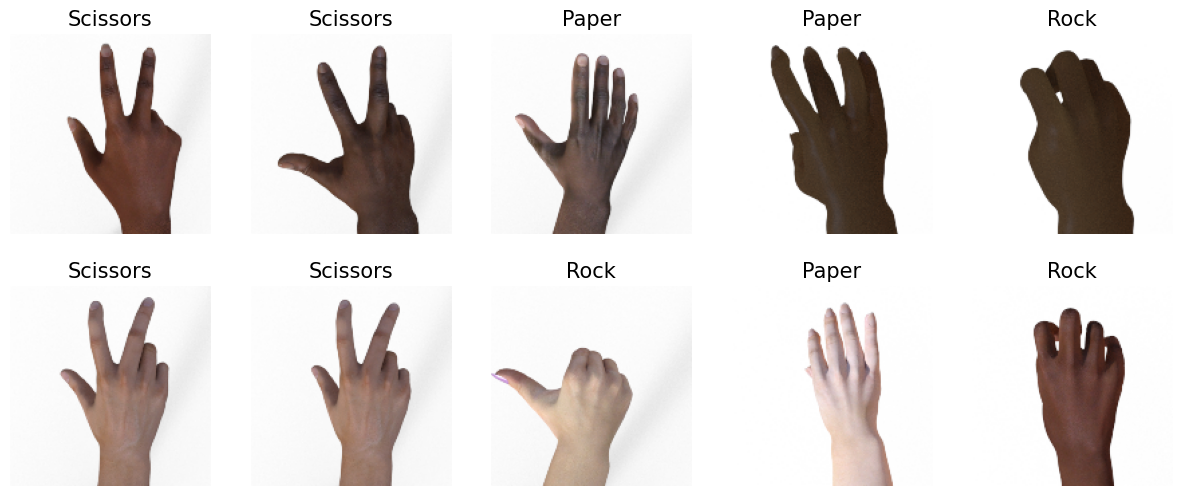

Augmentation 적용한 사진 파일
(32, 150, 150, 3) (32, 3)
[0. 0. 1.]


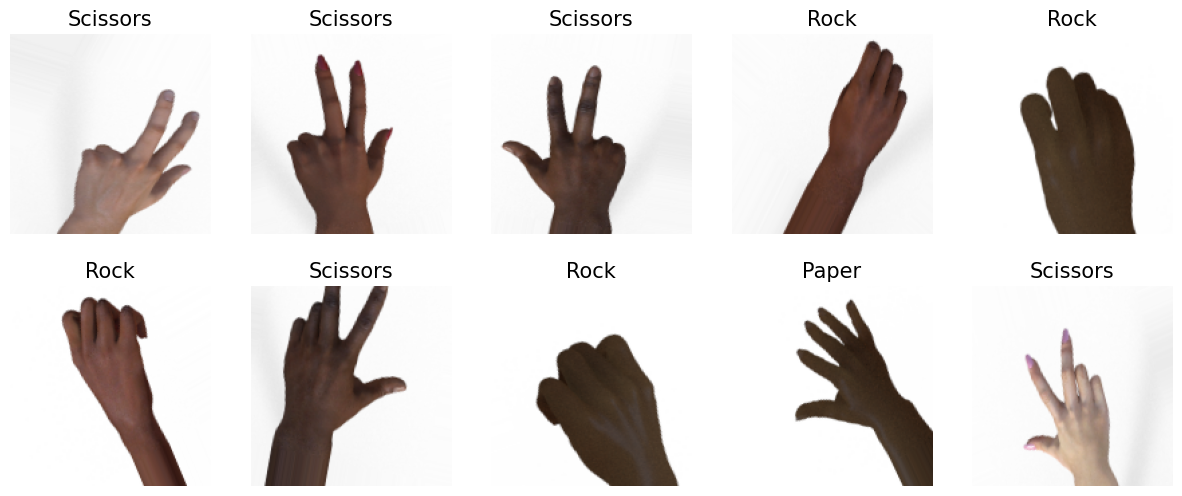

In [ ]:
import matplotlib.pyplot as plt

class_map = {
    0: 'Paper',
    1: 'Rock',
    2: 'Scissors'
}

print('오리지널 사진 파일')

original_datagen = ImageDataGenerator(rescale=1./255)
original_generator = original_datagen.flow_from_directory(TRAINING_DIR,
                                                          batch_size=128,
                                                          target_size=(150, 150),
                                                          class_mode='categorical'
                                                         )

for x, y in original_generator:
    print(x.shape, y.shape)
    print(y[0])

    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')
    plt.show()
    break

print('Augmentation 적용한 사진 파일')

for x, y in training_generator:
    print(x.shape, y.shape)
    print(y[0])

    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')

    plt.show()
    break

#Modeling

In [ ]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dropout(0.5),

    Dense(512, activation='relu'),

    Dense(3, activation='softmax'),

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#Compile

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
checkpoint_path = "tmp_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

#Fit

In [ ]:
epochs = 25

In [ ]:
history = model.fit(training_generator,
                    validation_data=(validation_generator),
                    epochs=epochs,
                    callbacks=[checkpoint],
                    )

Epoch 1/25
63/63 [==============================] - ETA: 0s - loss: 1.0487 - acc: 0.4211
Epoch 1: val_loss improved from inf to 0.93306, saving model to tmp_checkpoint.ckpt
63/63 [==============================] - 34s 347ms/step - loss: 1.0487 - acc: 0.4211 - val_loss: 0.9331 - val_acc: 0.5317
Epoch 2/25
63/63 [==============================] - ETA: 0s - loss: 0.7002 - acc: 0.6830
Epoch 2: val_loss did not improve from 0.93306
63/63 [==============================] - 21s 336ms/step - loss: 0.7002 - acc: 0.6830 - val_loss: 0.9375 - val_acc: 0.5020
Epoch 3/25
63/63 [==============================] - ETA: 0s - loss: 0.4490 - acc: 0.8209
Epoch 3: val_loss did not improve from 0.93306
63/63 [==============================] - 21s 331ms/step - loss: 0.4490 - acc: 0.8209 - val_loss: 1.4920 - val_acc: 0.5159
Epoch 4/25
63/63 [==============================] - ETA: 0s - loss: 0.2929 - acc: 0.8814
Epoch 4: val_loss improved from 0.93306 to 0.71101, saving model to tmp_checkpoint.ckpt
63/63 [=====

In [ ]:
model.load_weights(checkpoint_path)

#Prediction

In [ ]:
model.evaluate(validation_generator)

16/16 [==============================] - 4s 225ms/step - loss: 0.2235 - acc: 0.9206


[0.22353826463222504, 0.920634925365448]

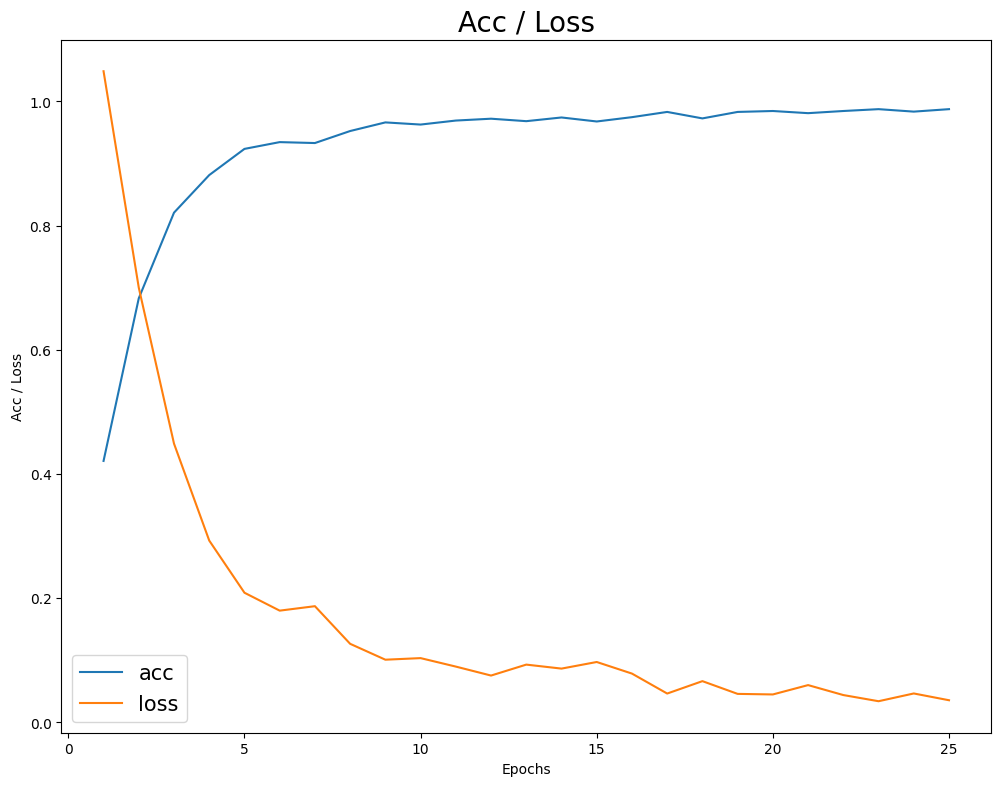

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, epochs+1), history.history['acc'])
plt.plot(np.arange(1, epochs+1), history.history['loss'])
plt.title('Acc / Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc / Loss')
plt.legend(['acc', 'loss'], fontsize=15)
plt.show()